Reference :
Dataset : https://github.com/rgbnihal2/COVID-19-X-ray-Dataset



In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [52]:
config = tf.compat.v1.ConfigProto(gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
#device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

Now we'll rearrange the images. Devide them into three folders train, validation, test.

In [53]:
os.chdir('E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master')
if os.path.isdir('train/covid') is False:
    os.makedirs('train/covid')
    os.makedirs('train/normal')
    os.makedirs('valid/covid')
    os.makedirs('valid/normal')
    os.makedirs('test/covid')
    os.makedirs('test/normal')
    

We'll copy images to related folders. First we'll maintain a ration of, <br>
80% train, 10% val, 10% test. <br>

In [54]:
os.chdir('E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master')

for i in random.sample(glob.glob('E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/COVID_Test*'),219):
    shutil.move(i, 'E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/train/covid')
for i in random.sample(glob.glob('E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/NORMAL_Test*'),219):
    shutil.move(i, 'E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/train/normal')
for i in random.sample(glob.glob('E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/COVID_Test*'), 28):
    shutil.move(i, 'E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/valid/covid')
for i in random.sample(glob.glob('E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/NORMAL_Test*'), 28):
    shutil.move(i, 'E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/valid/normal')
for i in random.sample(glob.glob('E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/COVID_Test*'), 26):
    shutil.move(i, 'E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/test/covid')
for i in random.sample(glob.glob('E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/NORMAL_Test*'), 26):
    shutil.move(i, 'E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/test/normal')

In [55]:
train_path = 'E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/train'
valid_path = 'E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/valid'
test_path = 'E:/DeepLearning/Datasets/COVID-19-X-ray-Dataset-master/test'

In [56]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['covid', 'normal'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['covid', 'normal'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['covid', 'normal'], batch_size=10, shuffle=False)

Found 438 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [57]:
imgs, labels = next(train_batches)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

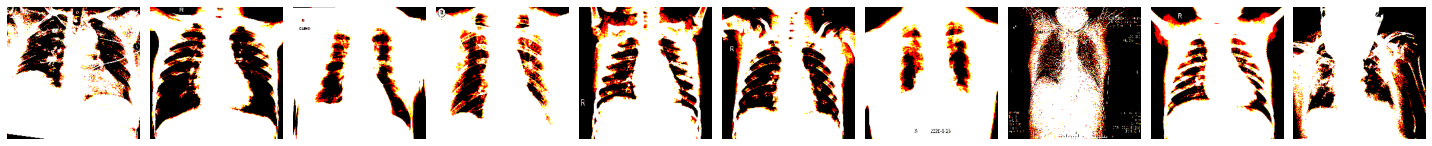

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [58]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [59]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [60]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
model.fit(x=train_batches,
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
44/44 - 16s - loss: 12.0588 - accuracy: 0.8607 - val_loss: 5.7647 - val_accuracy: 0.9464
Epoch 2/10
44/44 - 11s - loss: 2.7383 - accuracy: 0.9635 - val_loss: 3.1505 - val_accuracy: 0.9643
Epoch 3/10
44/44 - 11s - loss: 0.6719 - accuracy: 0.9772 - val_loss: 4.3738 - val_accuracy: 0.9286
Epoch 4/10
44/44 - 11s - loss: 0.2842 - accuracy: 0.9886 - val_loss: 3.6028 - val_accuracy: 0.9464
Epoch 5/10
44/44 - 11s - loss: 0.8322 - accuracy: 0.9886 - val_loss: 1.9837 - val_accuracy: 0.9643
Epoch 6/10
44/44 - 11s - loss: 0.0602 - accuracy: 0.9977 - val_loss: 2.1178 - val_accuracy: 0.9643
Epoch 7/10
44/44 - 11s - loss: 0.0111 - accuracy: 0.9954 - val_loss: 2.3040 - val_accuracy: 0.9464
Epoch 8/10
44/44 - 11s - loss: 0.1141 - accuracy: 0.9954 - val_loss: 1.7586 - val_accuracy: 0.9643
Epoch 9/10
44/44 - 11s - loss: 0.0914 - accuracy: 0.9954 - val_loss: 1.2236 - val_accuracy: 0.9643
Epoch 10/10
44/44 - 11s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.0128 - val_accuracy: 0.9643


### Predict


In [62]:
test_imgs, test_labels = next(test_batches)

In [63]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

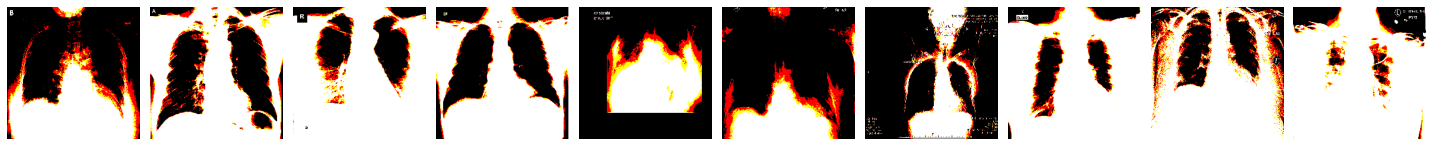

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [64]:
plotImages(test_imgs)
print(test_labels)

In [65]:
predictions = model.predict(x = test_batches, verbose=0)

In [66]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [67]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred= np.argmax(predictions, axis= -1)  )


In [68]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[26  0]
 [ 1 25]]


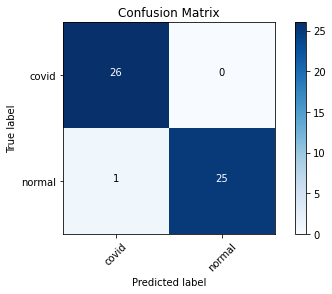

In [69]:
cm_plot_labels = ['covid','normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')